In [201]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

In [202]:
xytick_font = 18
xylabel_font = 24
legend_font = 16
figsize = (9, 6)

output_dir = "/home/lei/rajrup/KinectStream/Scripts/bitrate_splitting/bitrate_split_rmse_study/plots"

In [203]:
ground = "with_ground"
# ground = "no_ground"

# seq_name = f"160906_band2_{ground}"
# logID = 1

# seq_name = f"170307_dance5_{ground}"
# logID = 0

seq_name = f"170915_office1_{ground}"
logID = 2

metric = "pointssim"
split_adaptation = ["static", "dynamic"]
culling = "s_nocull_c_nocull"
# culling = "s_cull_c_cull"
d2c_static_splits = np.arange(0.45, 0.96, 0.05)

# static_data_dir = (
#     f"/datassd/pipeline_cpp/client_tiled/ablation/bitrate_static_split/{seq_name}/"
# )

static_data_dirs = [
    (
        split,
        f"/datassd/pipeline_cpp/client_tiled/ablation/bitrate_static_split_{split:g}/{seq_name}/",
    )
    for split in d2c_static_splits
]

dynamic_data_dir = (
    f"/datassd/pipeline_cpp/client_tiled/ablation/bitrate_dynamic_split/{seq_name}/"
)

In [204]:
data_dict = {"static": {}, "dynamic": {}}

In [205]:
bitrates = [60000, 80000, 100000, 120000]

metric_names = ["PSSIM_GEO_AB", "PSSIM_COLOR_AB"]
exp_names = ["PSSIM_GEO_GT_DIST", "PSSIM_COLOR_GT_DIST"]

print("Static Split:")
for bitrate in bitrates:
    if bitrate not in data_dict["static"]:
        data_dict["static"][bitrate] = {}
    for split, static_data_dir in static_data_dirs:
        data_dir = os.path.join(
            static_data_dir, f"comp_o3d_{metric}_{culling}", f"log{logID}"
        )
        pssim_path = os.path.join(data_dir, f"3D_{bitrate}k_pssim.csv")
        if not os.path.exists(pssim_path):
            raise FileNotFoundError(f"{pssim_path} not found")
        data = pd.read_csv(pssim_path)
        data_dict["static"][bitrate][split] = data

        avg_pssim_geo_ba = np.mean(data["PSSIM_GEO_AB"])
        avg_pssim_color_ba = np.mean(data["PSSIM_COLOR_AB"])

        print(
            f"bitrate={bitrate} kbps, split={split:0.2f} avg_pssim_geo_gt_dist={avg_pssim_geo_ba:.2f}, avg_pssim_color_gt_dist={avg_pssim_color_ba:.2f}"
        )

Static Split:
bitrate=60000 kbps, split=0.45 avg_pssim_geo_gt_dist=76.02, avg_pssim_color_gt_dist=86.43
bitrate=60000 kbps, split=0.50 avg_pssim_geo_gt_dist=77.50, avg_pssim_color_gt_dist=86.50
bitrate=60000 kbps, split=0.55 avg_pssim_geo_gt_dist=78.66, avg_pssim_color_gt_dist=86.53
bitrate=60000 kbps, split=0.60 avg_pssim_geo_gt_dist=79.86, avg_pssim_color_gt_dist=86.56
bitrate=60000 kbps, split=0.65 avg_pssim_geo_gt_dist=80.56, avg_pssim_color_gt_dist=86.58
bitrate=60000 kbps, split=0.70 avg_pssim_geo_gt_dist=81.82, avg_pssim_color_gt_dist=86.47
bitrate=60000 kbps, split=0.75 avg_pssim_geo_gt_dist=82.61, avg_pssim_color_gt_dist=86.29
bitrate=60000 kbps, split=0.80 avg_pssim_geo_gt_dist=83.33, avg_pssim_color_gt_dist=85.91
bitrate=60000 kbps, split=0.85 avg_pssim_geo_gt_dist=83.98, avg_pssim_color_gt_dist=85.38
bitrate=60000 kbps, split=0.90 avg_pssim_geo_gt_dist=84.64, avg_pssim_color_gt_dist=84.73
bitrate=60000 kbps, split=0.95 avg_pssim_geo_gt_dist=85.01, avg_pssim_color_gt_dist=83

In [206]:
data_dir = os.path.join(dynamic_data_dir, f"comp_o3d_{metric}_{culling}", f"log{logID}")

print("Dynamic Split:")
for bitrate in bitrates:
    pssim_path = os.path.join(data_dir, f"3D_{bitrate}k_pssim.csv")
    if not os.path.exists(pssim_path):
        raise FileNotFoundError(f"{pssim_path} not found")
    data = pd.read_csv(pssim_path)
    data_dict["dynamic"][bitrate] = data

    avg_pssim_geo_ba = np.mean(data["PSSIM_GEO_AB"])
    avg_pssim_color_ba = np.mean(data["PSSIM_COLOR_AB"])
    print(
        f"bitrate={bitrate} kbps, avg_pssim_geo_gt_dist={avg_pssim_geo_ba:.2f}, avg_pssim_color_gt_dist={avg_pssim_color_ba:.2f}"
    )

Dynamic Split:
bitrate=60000 kbps, avg_pssim_geo_gt_dist=84.49, avg_pssim_color_gt_dist=84.72
bitrate=80000 kbps, avg_pssim_geo_gt_dist=86.84, avg_pssim_color_gt_dist=85.19
bitrate=100000 kbps, avg_pssim_geo_gt_dist=88.80, avg_pssim_color_gt_dist=86.42
bitrate=120000 kbps, avg_pssim_geo_gt_dist=90.06, avg_pssim_color_gt_dist=87.11


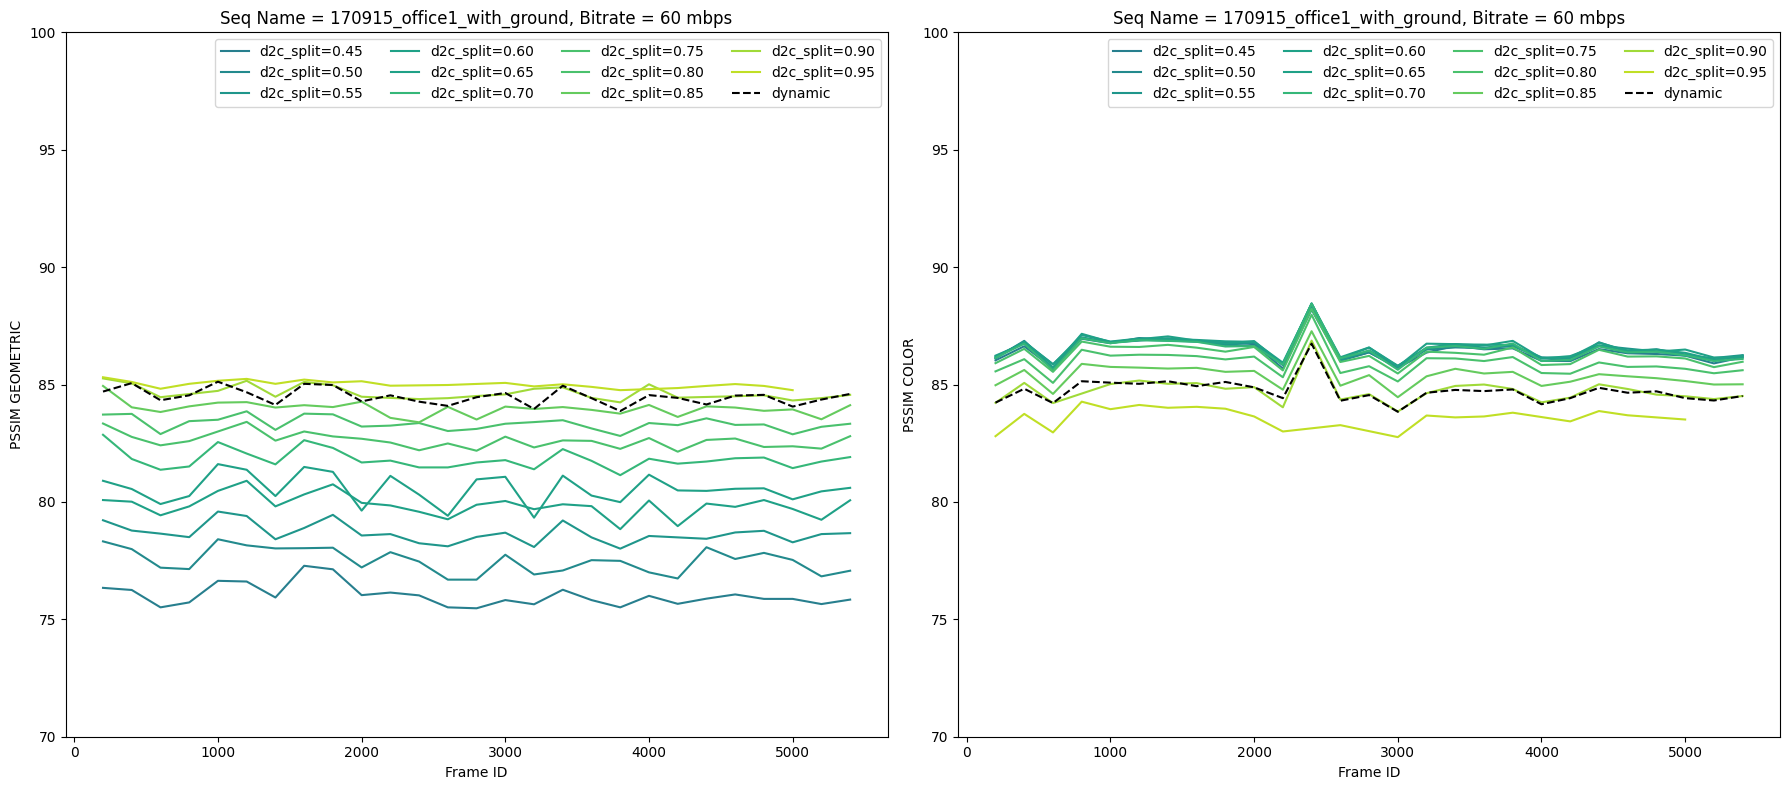

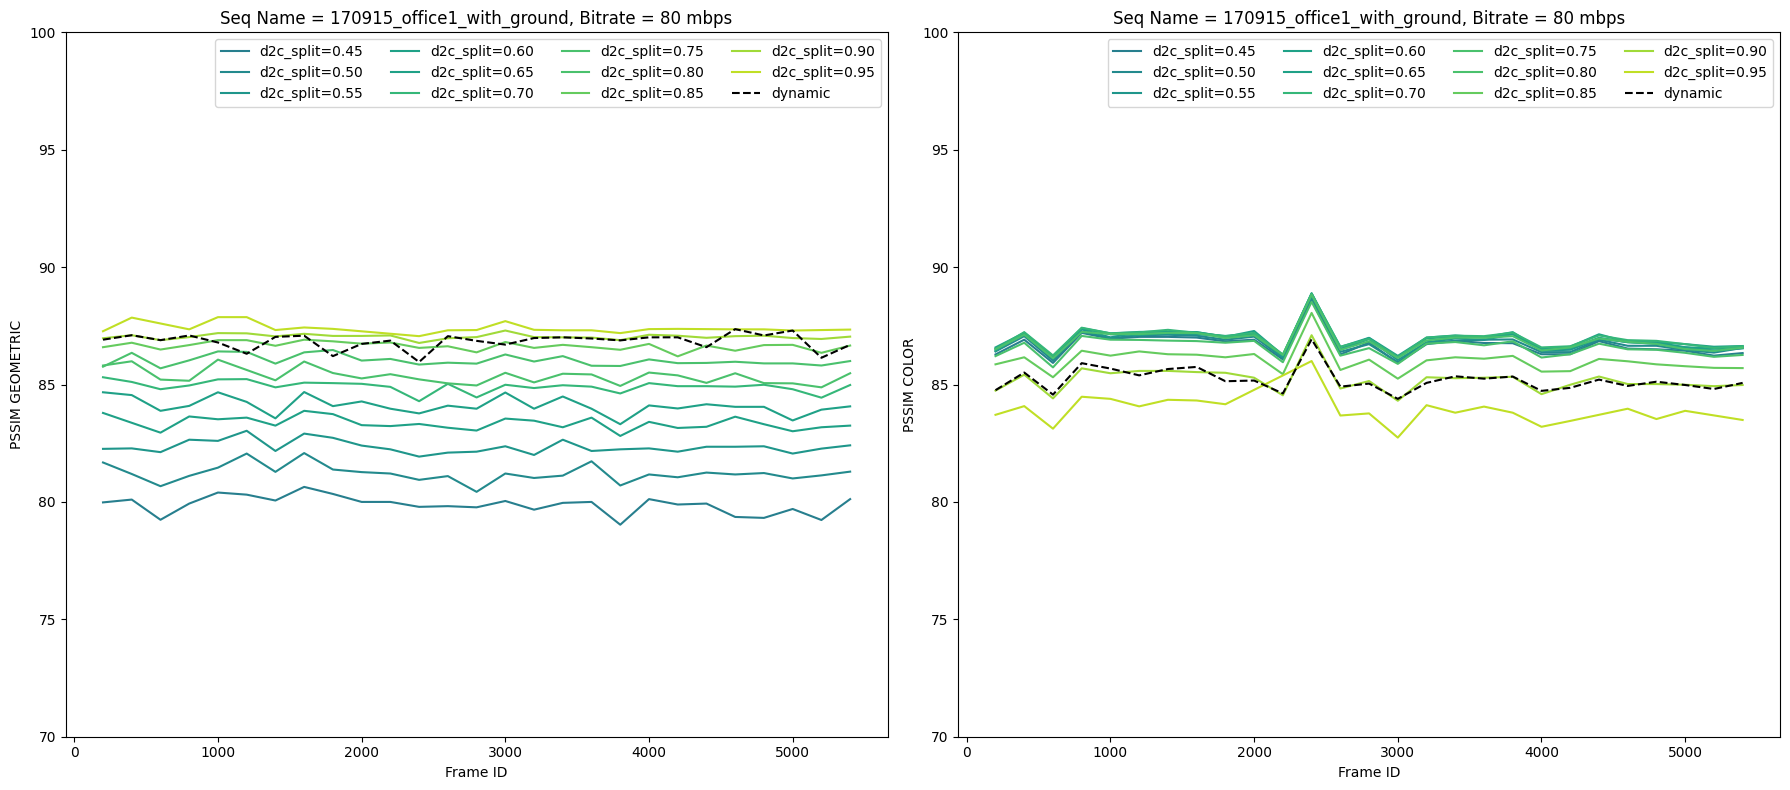

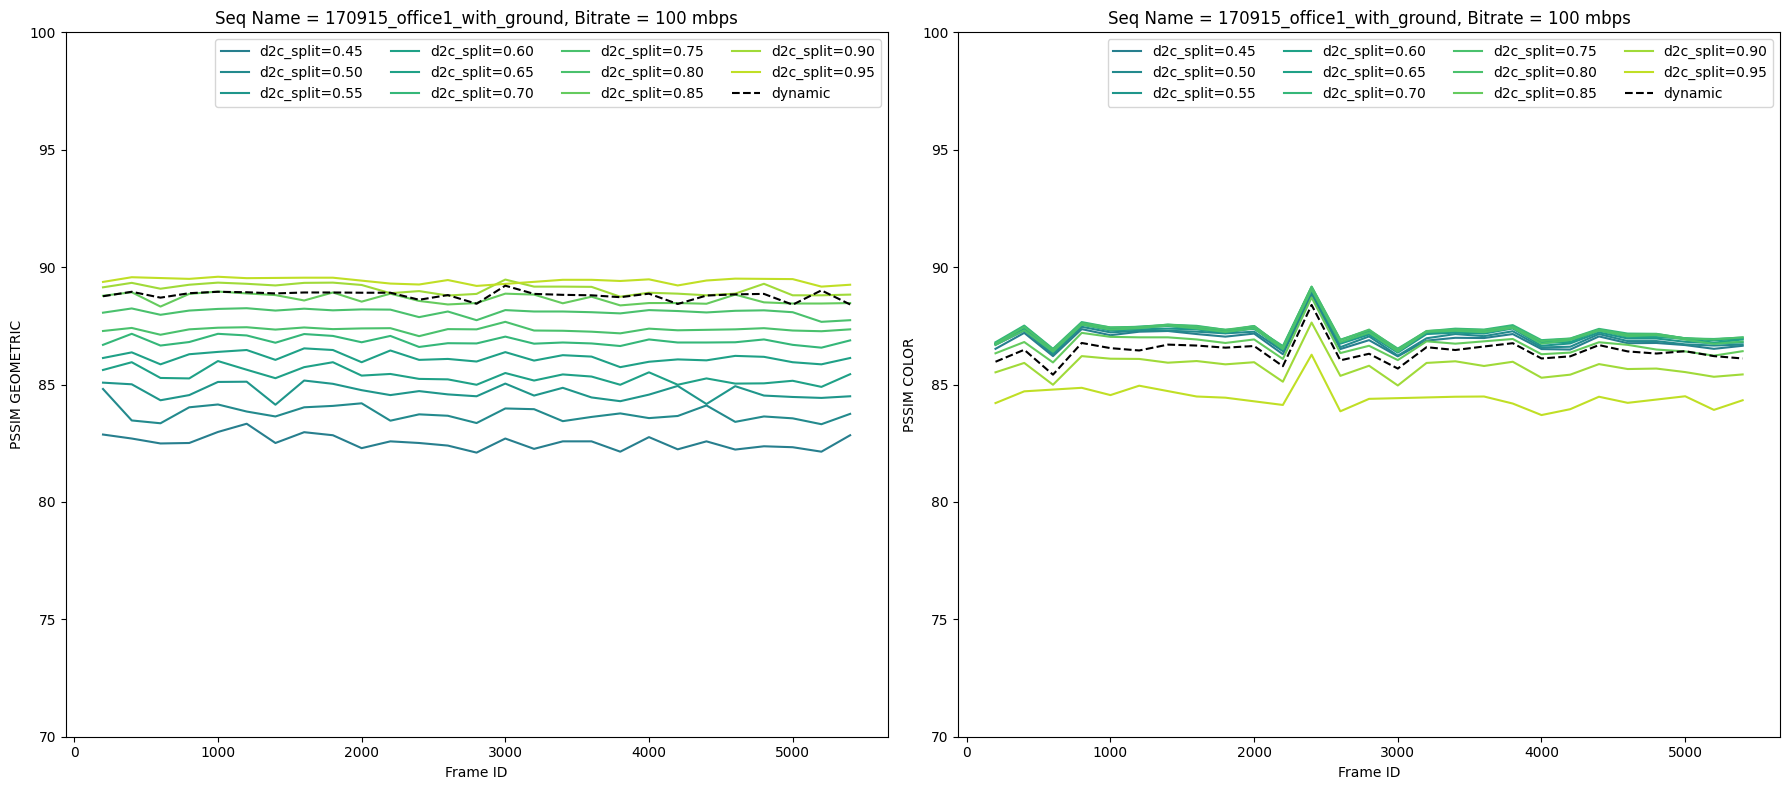

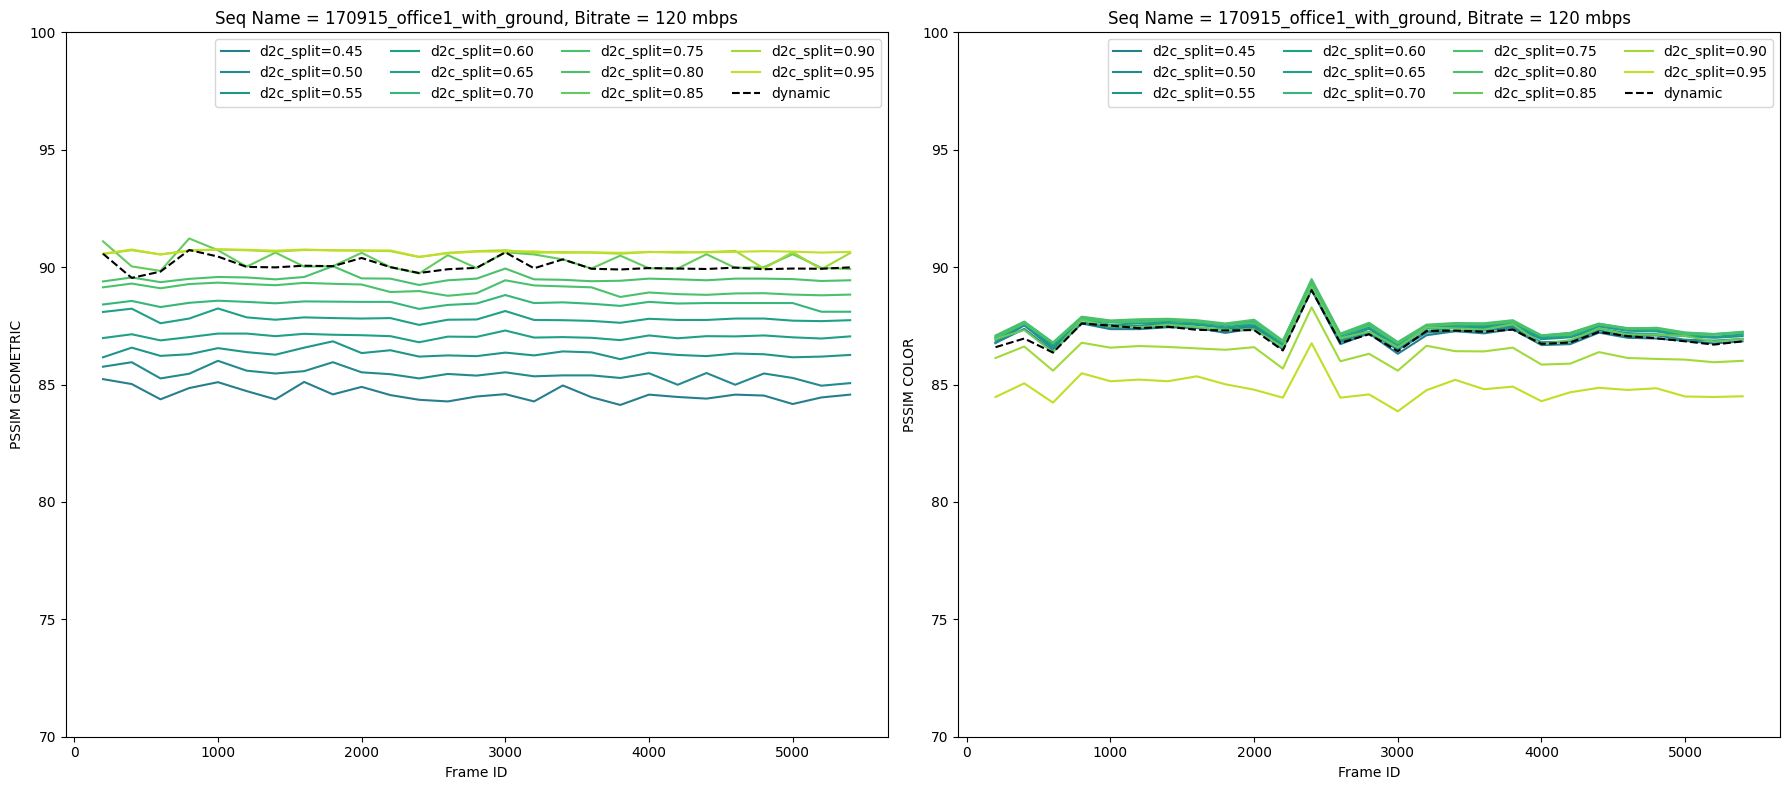

In [207]:
# plot PSSIM for static split and dynamic split vs frame id

# Use a cmap to color the lines based on the split value
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0, 1, 2 * len(d2c_static_splits)))

for bitrate in bitrates:
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    for split in d2c_static_splits:
        data = data_dict["static"][bitrate][split]
        ax[0].plot(
            data["Frame"],
            data["PSSIM_GEO_AB"],
            label=f"d2c_split={split:.2f}",
            color=colors[int(split * 20)],
        )
        ax[1].plot(
            data["Frame"],
            data["PSSIM_COLOR_AB"],
            label=f"d2c_split={split:.2f}",
            color=colors[int(split * 20)],
        )
    data = data_dict["dynamic"][bitrate]
    ax[0].plot(
        data["Frame"],
        data["PSSIM_GEO_AB"],
        label="dynamic",
        color="black",
        linestyle="--",
    )
    ax[1].plot(
        data["Frame"],
        data["PSSIM_COLOR_AB"],
        label="dynamic",
        color="black",
        linestyle="--",
    )

    ax[0].set_ylim([70, 100])
    ax[0].set_title(f"Seq Name = {seq_name}, Bitrate = {bitrate//1000} mbps")
    ax[0].set_xlabel("Frame ID")
    ax[0].set_ylabel("PSSIM GEOMETRIC")
    ax[0].legend(ncol=4)
    ax[1].set_ylim([70, 100])
    ax[1].set_title(f"Seq Name = {seq_name}, Bitrate = {bitrate//1000} mbps")
    ax[1].set_xlabel("Frame ID")
    ax[1].set_ylabel("PSSIM COLOR")
    ax[1].legend(ncol=4)

    # Reduce whitespace between plots
    plt.tight_layout()
    plt.show()

In [208]:
# plot PSSIM for static split and dynamic split vs bitrate

data_bitrate_df = pd.DataFrame(
    columns=[
        "bitrate",
        "split",
        "Mean_PSSIM_GEO_AB",
        "Std_PSSIM_GEO_AB",
        "Mean_PSSIM_COLOR_AB",
        "Std_PSSIM_COLOR_AB",
    ]
)

for bitrate in bitrates:
    for split in d2c_static_splits:
        data = data_dict["static"][bitrate][split]
        mean_pssim_geo = np.mean(data["PSSIM_GEO_AB"])
        std_pssim_geo = np.std(data["PSSIM_GEO_AB"])
        mean_pssim_color = np.mean(data["PSSIM_COLOR_AB"])
        std_pssim_color = np.std(data["PSSIM_COLOR_AB"])
        data_bitrate_df = data_bitrate_df.append(
            {
                "bitrate": bitrate,
                "split": f"static_{split:.2f}",
                "Mean_PSSIM_GEO_AB": mean_pssim_geo,
                "Std_PSSIM_GEO_AB": std_pssim_geo,
                "Mean_PSSIM_COLOR_AB": mean_pssim_color,
                "Std_PSSIM_COLOR_AB": std_pssim_color,
            },
            ignore_index=True,
        )

    data = data_dict["dynamic"][bitrate]
    mean_pssim_geo = np.mean(data["PSSIM_GEO_AB"])
    std_pssim_geo = np.std(data["PSSIM_GEO_AB"])
    mean_pssim_color = np.mean(data["PSSIM_COLOR_AB"])
    std_pssim_color = np.std(data["PSSIM_COLOR_AB"])
    data_bitrate_df = data_bitrate_df.append(
        {
            "bitrate": bitrate,
            "split": "dynamic",
            "Mean_PSSIM_GEO_AB": mean_pssim_geo,
            "Std_PSSIM_GEO_AB": std_pssim_geo,
            "Mean_PSSIM_COLOR_AB": mean_pssim_color,
            "Std_PSSIM_COLOR_AB": std_pssim_color,
        },
        ignore_index=True,
    )

data_bitrate_df = data_bitrate_df.astype(
    {
        "bitrate": int,
        "split": str,
        "Mean_PSSIM_GEO_AB": float,
        "Std_PSSIM_GEO_AB": float,
        "Mean_PSSIM_COLOR_AB": float,
        "Std_PSSIM_COLOR_AB": float,
    }
)

data_bitrate_df

,bitrate,split,Mean_PSSIM_GEO_AB,Std_PSSIM_GEO_AB,Mean_PSSIM_COLOR_AB,Std_PSSIM_COLOR_AB
0,60000,static_0.45,76.017037,0.453389,86.434815,0.517325
1,60000,static_0.50,77.504074,0.518261,86.499259,0.520427
2,60000,static_0.55,78.664815,0.401833,86.530000,0.513240
3,60000,static_0.60,79.860741,0.456086,86.563333,0.516563
4,60000,static_0.65,80.564074,0.598438,86.577407,0.531389
5,60000,static_0.70,81.818148,0.396634,86.473704,0.538174
6,60000,static_0.75,82.613704,0.317118,86.286296,0.529256
7,60000,static_0.80,83.333333,0.274901,85.913704,0.546119
8,60000,static_0.85,83.976667,0.298118,85.378519,0.519813
9,60000,static_0.90,84.640385,0.284990,84.731923,0.552915


/tmp/ipykernel_631568/3111181828.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(70, 101, 5), fontsize=xytick_font)


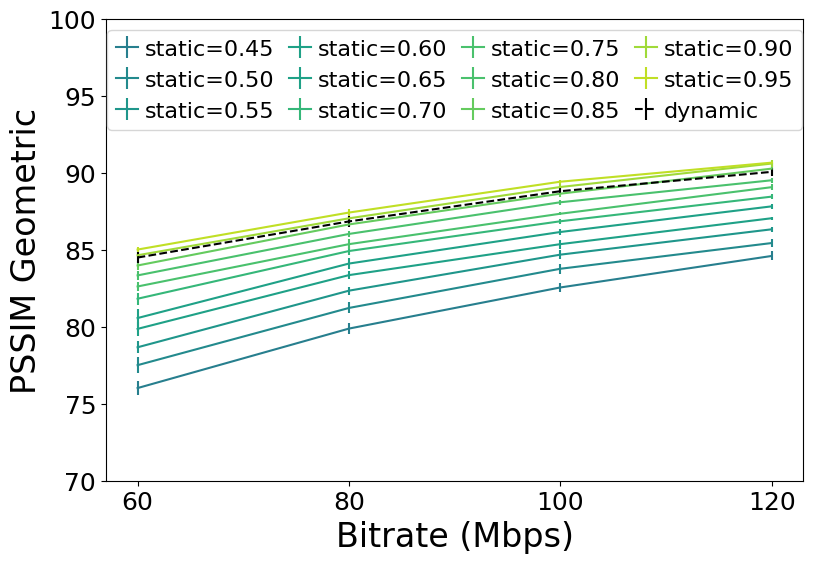

/tmp/ipykernel_631568/3111181828.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(70, 101, 5), fontsize=xytick_font)


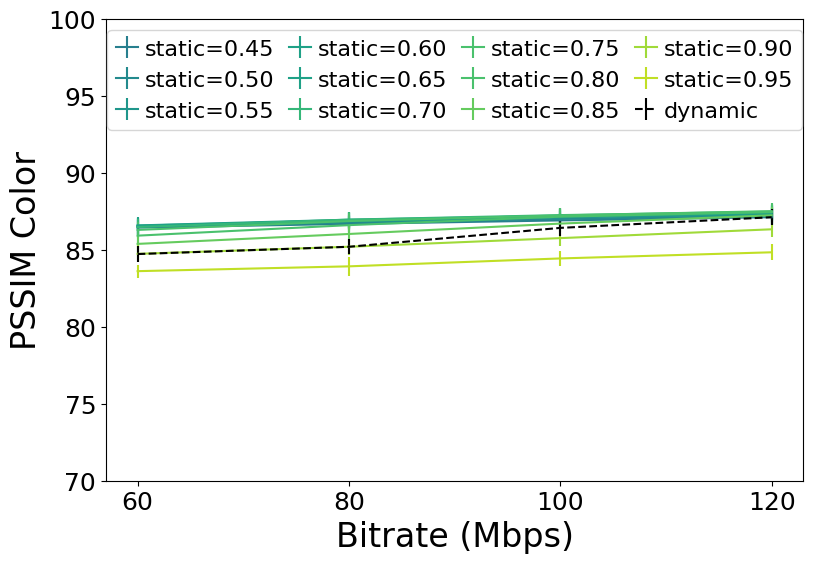

In [209]:
# plot PSSIM for static split and dynamic split vs bitrate got office1 with ground
# Geo
fig, ax = plt.subplots(1, 1, figsize=figsize)
for split in d2c_static_splits:
    data = data_bitrate_df[data_bitrate_df["split"] == f"static_{split:.2f}"]
    ax.errorbar(
        data["bitrate"],
        data["Mean_PSSIM_GEO_AB"],
        yerr=data["Std_PSSIM_GEO_AB"],
        label=f"static={split:.2f}",
        color=colors[int(split * 20)],
        # capsize=2,
    )

data = data_bitrate_df[data_bitrate_df["split"] == "dynamic"]
ax.errorbar(
    data["bitrate"],
    data["Mean_PSSIM_GEO_AB"],
    yerr=data["Std_PSSIM_GEO_AB"],
    label="dynamic",
    color="black",
    linestyle="--",
    # capsize=2,
)

ax.set_xticks(bitrates)
ax.set_xticklabels([f"{bitrate//1000}" for bitrate in bitrates], fontsize=xytick_font)
# ax.set_title(f"Seq Name = {seq_name}, PSSIM GEOMETRIC")
ax.set_xlabel("Bitrate (Mbps)", fontsize=xylabel_font)
ax.set_ylabel("PSSIM Geometric", fontsize=xylabel_font)
# ax.set_xticklabels(data["bitrate"], fontsize=xytick_font)
ax.set_ylim(70, 100)
ax.set_yticklabels(np.arange(70, 101, 5), fontsize=xytick_font)
# ax.legend(ncol=4)
legend = plt.legend(
    loc="upper center",
    handlelength=1,
    handletextpad=0.3,
    columnspacing=0.65,
    ncol=4,
    fontsize=legend_font,
)

plt.show()

# Save figure to pdf file
fig.savefig(
    os.path.join(output_dir, "static_vs_dynamic_pssim_geo.pdf"),
    bbox_inches="tight",
)

# Color

fig, ax = plt.subplots(1, 1, figsize=figsize)
for split in d2c_static_splits:
    data = data_bitrate_df[data_bitrate_df["split"] == f"static_{split:.2f}"]
    ax.errorbar(
        data["bitrate"],
        data["Mean_PSSIM_COLOR_AB"],
        yerr=data["Std_PSSIM_COLOR_AB"],
        label=f"static={split:.2f}",
        color=colors[int(split * 20)],
        # capsize=2,
    )

data = data_bitrate_df[data_bitrate_df["split"] == "dynamic"]
ax.errorbar(
    data["bitrate"],
    data["Mean_PSSIM_COLOR_AB"],
    yerr=data["Std_PSSIM_COLOR_AB"],
    label="dynamic",
    color="black",
    linestyle="--",
    # capsize=2,
)

ax.set_xticks(bitrates)
ax.set_xticklabels([f"{bitrate//1000}" for bitrate in bitrates], fontsize=xytick_font)
# ax.set_title(f"Seq Name = {seq_name}, PSSIM COLOR")
ax.set_xlabel("Bitrate (Mbps)", fontsize=xylabel_font)
ax.set_ylabel("PSSIM Color", fontsize=xylabel_font)
# ax.set_xticklabels(data["bitrate"], fontsize=xytick_font)
ax.set_ylim(70, 100)
ax.set_yticklabels(np.arange(70, 101, 5), fontsize=xytick_font)
# ax.legend(ncol=4)
legend = plt.legend(
    loc="upper center",
    handlelength=1,
    handletextpad=0.3,
    columnspacing=0.65,
    ncol=4,
    fontsize=legend_font,
)

plt.show()

# Save figure to pdf file
fig.savefig(
    os.path.join(output_dir, "static_vs_dynamic_pssim_color.pdf"),
    bbox_inches="tight",
)

In [210]:
# plot split vs frame id
dynamic_data_dir = (
    f"/datassd/pipeline_cpp/client_tiled/ablation/bitrate_dynamic_split/{seq_name}/"
)

data_dir = os.path.join(dynamic_data_dir, f"bitrate_split_{culling}", f"log{logID}")
for bitrate in bitrates:
    data_path = os.path.join(data_dir, f"rmse_split{bitrate}_adapt.txt")
    if not os.path.exists(data_path):
        raise FileNotFoundError(f"{data_path} not found")
    data = pd.read_csv(data_path)
    data_dict[bitrate] = data

data_dict[60000]

,FrameID,cRMSE,dRMSE,d2c_split,dRMSE-cRMSE,step_size,Time
0,100,0.00000,0.0000,0.875,0.00000,0.000000,26
1,102,8.47036,14.9042,0.890,6.43382,0.012868,23
2,104,8.44043,14.9453,0.900,6.50483,0.013010,25
3,106,8.41884,14.9037,0.900,6.48482,0.012970,31
4,108,8.47219,14.9637,0.900,6.49147,0.012983,26
...,...,...,...,...,...,...,...
3926,5593,12.07180,22.7277,0.900,10.65590,0.021312,28
3927,5595,11.98620,22.6957,0.900,10.70940,0.021419,28
3928,5596,12.05850,22.6722,0.900,10.61370,0.021227,27
3929,5597,12.08300,22.8125,0.900,10.72950,0.021459,30


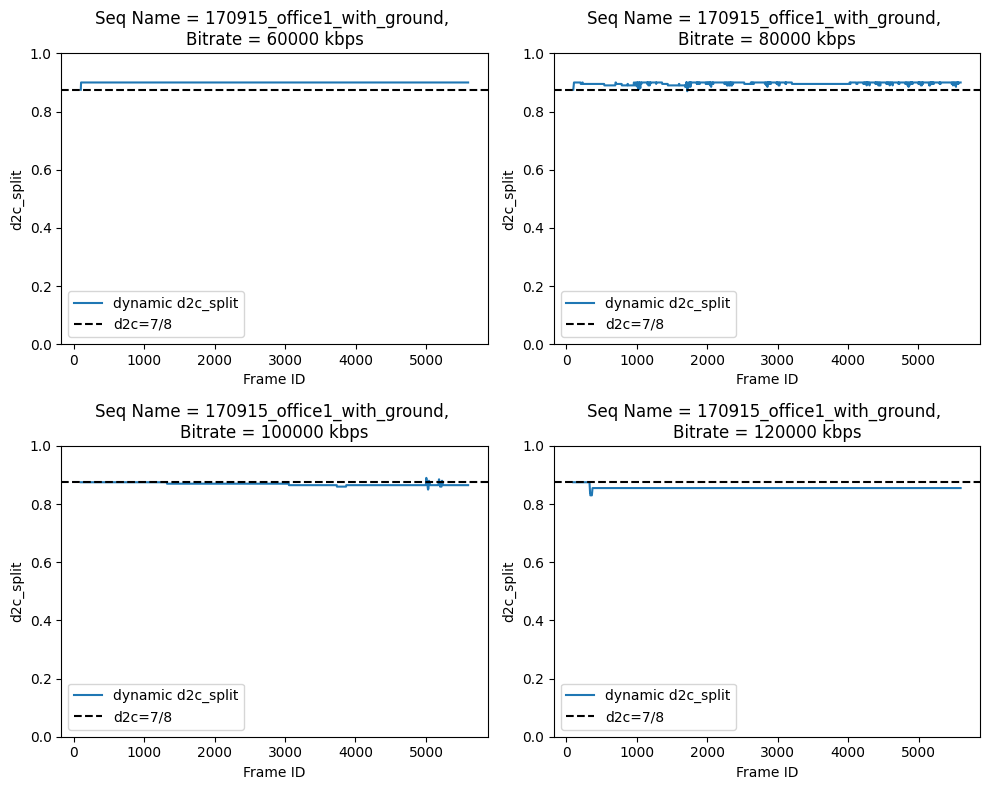

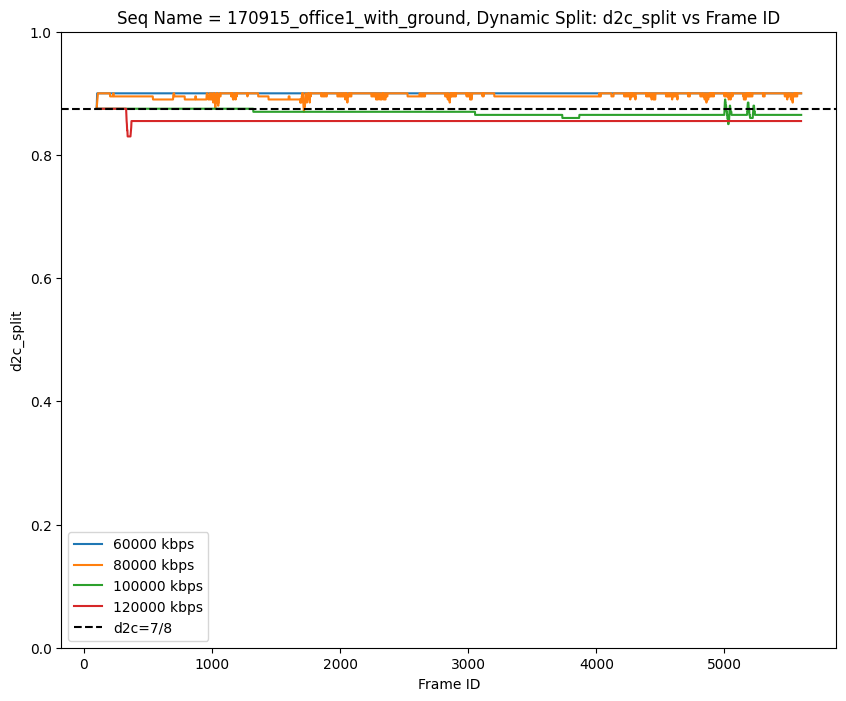

In [211]:
# plot split vs frame id, one plot for each bitrate

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
for i, bitrate in enumerate(bitrates):
    data = data_dict[bitrate]
    ax[i // 2, i % 2].plot(
        data["FrameID"], data["d2c_split"], label=f"dynamic d2c_split"
    )
    ax[i // 2, i % 2].set_xlabel("Frame ID")
    ax[i // 2, i % 2].set_ylabel("d2c_split")
    ax[i // 2, i % 2].set_ylim([0.0, 1])
    ax[i // 2, i % 2].title.set_text(
        f"Seq Name = {seq_name}, \nBitrate = {bitrate} kbps"
    )
    ax[i // 2, i % 2].axhline(y=0.875, color="k", linestyle="--", label="d2c=7/8")
    ax[i // 2, i % 2].legend()
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for bitrate in bitrates:
    data = data_dict[bitrate]
    ax.plot(data["FrameID"], data["d2c_split"], label=f"{bitrate} kbps")
ax.set_xlabel("Frame ID")
ax.set_ylabel("d2c_split")
ax.set_ylim([0.0, 1])

# draw horizontal line at y=0.875
ax.axhline(y=0.875, color="k", linestyle="--", label="d2c=7/8")
ax.legend()
ax.title.set_text(f"Seq Name = {seq_name}, Dynamic Split: d2c_split vs Frame ID")
plt.show()

/tmp/ipykernel_631568/3620658557.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


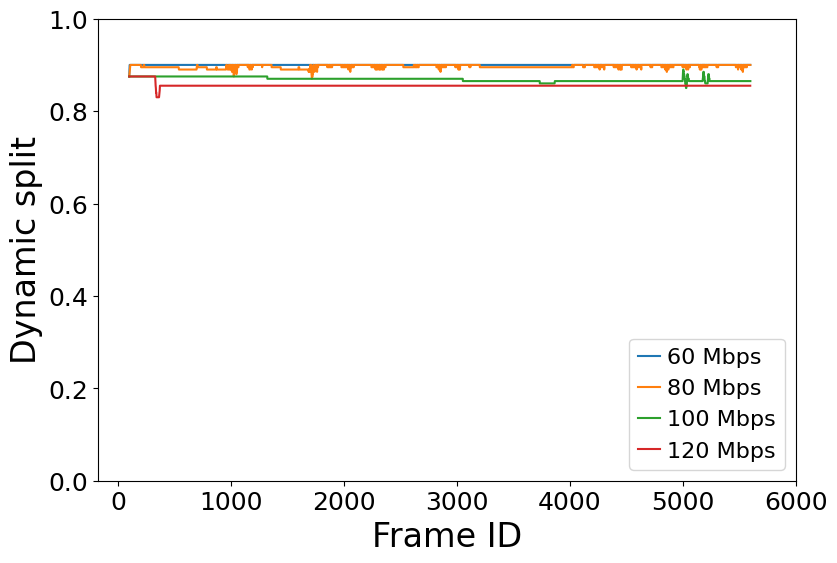

In [212]:
fig, ax = plt.subplots(1, 1, figsize=figsize)
for bitrate in bitrates:
    data = data_dict[bitrate]
    ax.plot(data["FrameID"], data["d2c_split"], label=f"{bitrate//1000} Mbps")
# ax.set_xlabel("Frame ID")
# ax.set_ylabel("Split")
# ax.set_ylim([0.0, 1])

# draw horizontal line at y=0.875
# ax.axhline(y=0.875, color="k", linestyle="--", label="d2c=7/8")
ax.legend()

xticks = np.arange(0, np.max(data["FrameID"]) + 1000, 1000)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=xytick_font)
# ax.title.set_text(f"Seq Name = {seq_name}, Dynamic Split: d2c_split vs Frame ID")
ax.set_xlabel("Frame ID", fontsize=xylabel_font)
ax.set_ylabel("Dynamic split", fontsize=xylabel_font)
# ax.set_xticklabels(data["bitrate"], fontsize=xytick_font)
ax.set_ylim([0.0, 1.0])
# print(np.arange(0.0, 1.1, 0.1))
ax.set_yticklabels(
    [f"{ytick:.1f}" for ytick in np.arange(0.0, 1.1, 0.2)], fontsize=xytick_font
)
# ax.legend(ncol=4)
legend = plt.legend(
    loc="lower right",
    handlelength=1,
    handletextpad=0.3,
    columnspacing=1.0,
    # ncol=4,
    fontsize=legend_font,
)

plt.show()

# Save figure to pdf file
fig.savefig(
    os.path.join(output_dir, "split_convergence.pdf"),
    bbox_inches="tight",
)

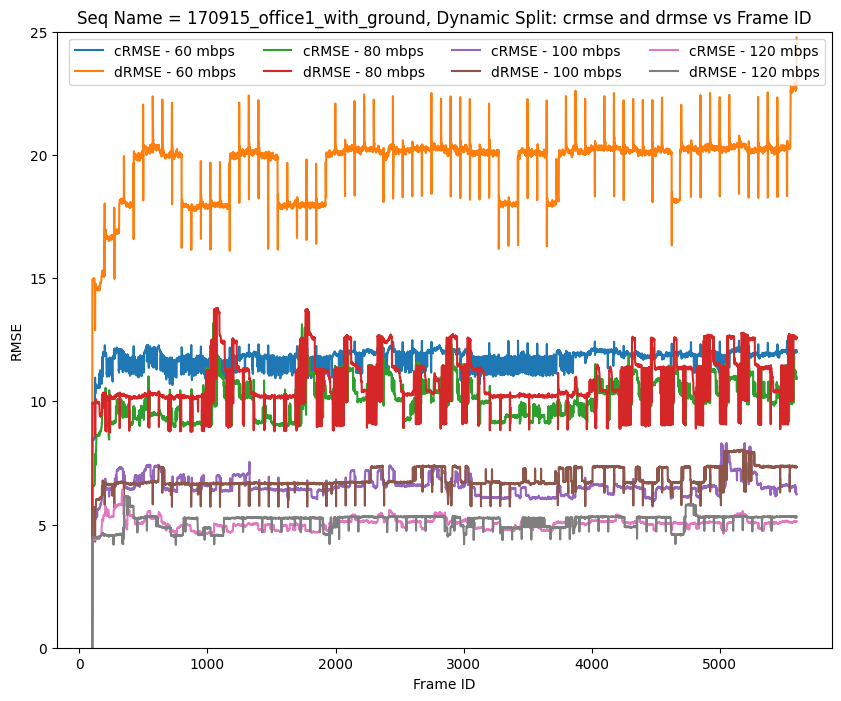

In [213]:
# plot crmse and drmse vs frame id
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for bitrate in bitrates:
    data = data_dict[bitrate]
    ax.plot(data["FrameID"], data["cRMSE"], label=f"cRMSE - {bitrate//1000} mbps")
    ax.plot(data["FrameID"], data["dRMSE"], label=f"dRMSE - {bitrate//1000} mbps")
ax.set_xlabel("Frame ID")
ax.set_ylabel("RMSE")
ax.legend(ncol=4)
ax.title.set_text(f"Seq Name = {seq_name}, Dynamic Split: crmse and drmse vs Frame ID")
ax.set_ylim([0, 25])
plt.show()

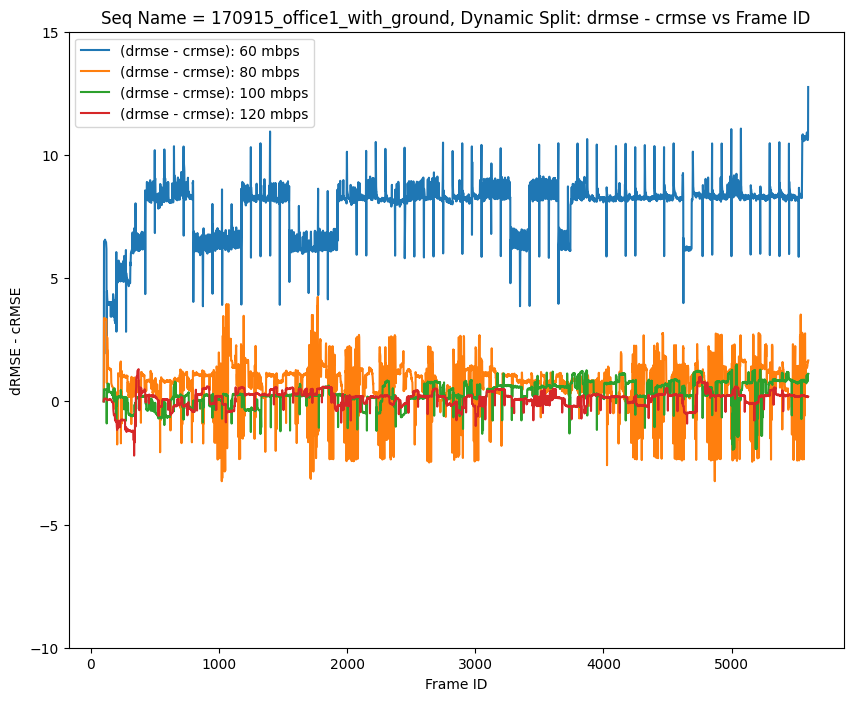

In [214]:
# plot drmse - cmrse vs frame id
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for bitrate in bitrates:
    data = data_dict[bitrate]
    ax.plot(
        data["FrameID"],
        data["dRMSE-cRMSE"],
        label=f"(drmse - crmse): {bitrate//1000} mbps",
    )
ax.set_xlabel("Frame ID")
ax.set_ylabel("dRMSE - cRMSE")
ax.set_ylim([-10, 15])
ax.legend()
ax.title.set_text(f"Seq Name = {seq_name}, Dynamic Split: drmse - crmse vs Frame ID")
plt.show()